In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | praia
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | guangyuan
Processing Record 14 of Set 1 | burica
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | balod
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | abu samra

Processing Record 37 of Set 4 | takapau
Processing Record 38 of Set 4 | raudeberg
Processing Record 39 of Set 4 | brokopondo
Processing Record 40 of Set 4 | sabha
Processing Record 41 of Set 4 | camacha
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | henties bay
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | macusani
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | luanda
Processing Record 48 of Set 4 | port hawkesbury
Processing Record 49 of Set 4 | tessalit
Processing Record 50 of Set 4 | katsuura
Processing Record 1 of Set 5 | catalina
Processing Record 2 of Set 5 | bien hoa
Processing Record 3 of Set 5 | conakry
Processing Record 4 of Set 5 | karakendzha
City not found. Skipping...
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | lilongwe
Processing Record 7 of Set 5 | vallenar
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | homer
Processing Record 

Processing Record 30 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 8 | eureka
Processing Record 32 of Set 8 | angra
City not found. Skipping...
Processing Record 33 of Set 8 | asayita
City not found. Skipping...
Processing Record 34 of Set 8 | wladyslawowo
Processing Record 35 of Set 8 | rojhan
Processing Record 36 of Set 8 | venado tuerto
Processing Record 37 of Set 8 | plouzane
Processing Record 38 of Set 8 | mkushi
Processing Record 39 of Set 8 | umm lajj
Processing Record 40 of Set 8 | havre-saint-pierre
Processing Record 41 of Set 8 | labuhan
Processing Record 42 of Set 8 | bambari
Processing Record 43 of Set 8 | malakal
Processing Record 44 of Set 8 | paungde
Processing Record 45 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 8 | omboue
Processing Record 47 of Set 8 | staraya poltavka
Processing Record 48 of Set 8 | turtkul
City not found. Skipping...
Processing Record 49 of Set 8 | morgan city
Processing Record 50 o

Processing Record 14 of Set 12 | shimoda
Processing Record 15 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 16 of Set 12 | sembe
Processing Record 17 of Set 12 | axim
Processing Record 18 of Set 12 | andenes
Processing Record 19 of Set 12 | san patricio
Processing Record 20 of Set 12 | upata
Processing Record 21 of Set 12 | senanga
Processing Record 22 of Set 12 | chipinge
Processing Record 23 of Set 12 | waipawa
Processing Record 24 of Set 12 | santo domingo
Processing Record 25 of Set 12 | banjar
Processing Record 26 of Set 12 | russell
Processing Record 27 of Set 12 | kununurra
Processing Record 28 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 29 of Set 12 | nemuro
Processing Record 30 of Set 12 | ardahan
Processing Record 31 of Set 12 | palmer
Processing Record 32 of Set 12 | madiun
Processing Record 33 of Set 12 | west plains
Processing Record 34 of Set 12 | marsa matruh
Processing Record 35 of Set 12 | kungurtug
Processing Re

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,19.80,84,59,13.20,CA,2022-04-13 00:04:06
1,Punta Arenas,-53.1500,-70.9167,44.11,70,61,18.92,CL,2022-04-13 00:00:59
2,Atuona,-9.8000,-139.0333,79.34,74,32,16.02,PF,2022-04-13 00:03:05
3,Victoria,22.2855,114.1577,79.25,86,11,3.00,HK,2022-04-13 00:01:40
4,Laguna,38.4210,-121.4238,65.05,28,75,4.61,US,2022-04-13 00:04:07
5,Ushuaia,-54.8000,-68.3000,40.62,90,83,6.80,AR,2022-04-13 00:04:08
6,Praia,14.9215,-23.5087,69.12,81,97,13.98,CV,2022-04-13 00:04:09
7,Butaritari,3.0707,172.7902,81.52,77,37,16.17,KI,2022-04-13 00:04:09
8,Mataura,-46.1927,168.8643,56.26,55,75,3.49,NZ,2022-04-13 00:04:10
9,Guangyuan,32.4420,105.8230,59.77,71,36,3.62,CN,2022-04-13 00:04:10


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649809603.571531

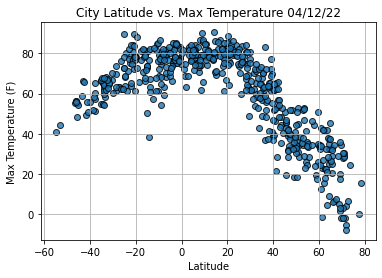

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

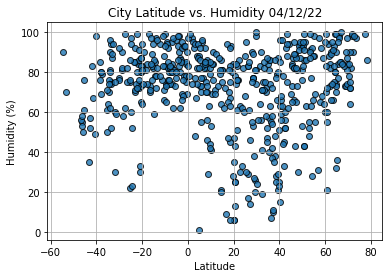

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

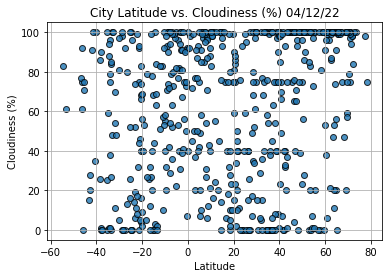

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

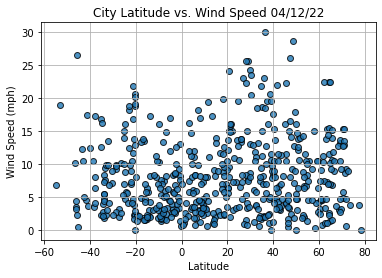

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()